## Домашнее задание 2   
Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10  
Библиотеки: [Python, Tensorflow]

### Загрузка и подготовка датасета CIFAR10

In [13]:
from __future__ import print_function
import keras 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

%matplotlib inline
import matplotlib.pyplot as plt

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


### Визуализация датасета cifar10

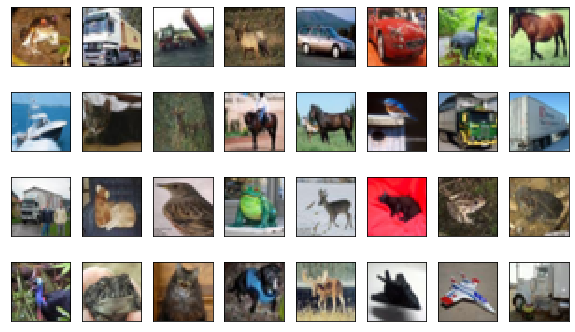

In [19]:
some_samples = x_train[:32, :]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:])
    plt.xticks([]), plt.yticks([])
plt.show()

### Создание пайплайна данных

In [26]:
batch_size = 32
num_classes = 10
epochs = 5
num_predictions = 20

# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0., 
    zoom_range=0., 
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

    # запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/5
1563/1563 [==============================] - 146s 94ms/step - loss: 2.1756 - accuracy: 0.1952 - val_loss: 2.0223 - val_accuracy: 0.2697
Epoch 2/5
1563/1563 [==============================] - 145s 93ms/step - loss: 2.0369 - accuracy: 0.2583 - val_loss: 1.9345 - val_accuracy: 0.3000
Epoch 3/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.9815 - accuracy: 0.2780 - val_loss: 1.8779 - val_accuracy: 0.3240
Epoch 4/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.9328 - accuracy: 0.2975 - val_loss: 1.8146 - val_accuracy: 0.3478
Epoch 5/5
10000/10000 [==============================] - 7s 727us/step
Test loss: 1.6949010093688965
Test accuracy: 0.387800008058548
